### Deskripsi Data
Dataset Penjualan Superstore berisi data penjualan transaksional dari toko ritel besar yang menawarkan berbagai macam produk.

Dataset ini mencatat informasi terkait pendapatan penjualan, kategori produk, wilayah, dan segmen pelanggan.

Dataset ini umumnya digunakan untuk menganalisis kinerja penjualan, mengidentifikasi tren, dan mendukung keputusan bisnis berbasis data.

Dengan menganalisis data ini, bisnis dapat mengevaluasi produk, wilayah, dan segmen pelanggan mana yang paling berkontribusi terhadap pendapatan, serta mendeteksi periode pertumbuhan atau penurunan.

Wawasan dari analisis ini dapat membantu meningkatkan strategi penjualan, manajemen inventaris, dan kinerja bisnis secara keseluruhan.

## Masalah Bisnis

Perusahaan ingin memahami kinerja penjualan secara keseluruhan untuk mendukung pengambilan keputusan bisnis, khususnya terkait manajemen persediaan dan strategi penjualan.

Pertanyaan utama yang ingin dijawab adalah:
- Bagaimana tren penjualan dari waktu ke waktu?

- Kategori produk mana yang paling berkontribusi terhadap penjualan?

- Apakah ada pola musiman yang memengaruhi kinerja penjualan?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/superstore_final_dataset.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [2]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row_ID,9800.0,NaN,NaN,NaN,4900.5,2829.160653,1.0,2450.75,4900.5,7350.25,9800.0
Order_ID,9800,4922,CA-2018-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_Date,9800,1230,5/9/2017,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship_Date,9800,1326,26/09/2018,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship_Mode,9800,4,Standard Class,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,9800,793,WB-21850,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Name,9800,793,William Brown,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9800,3,Consumer,5101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9800,1,United States,9800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9800,529,New York City,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date']=pd.to_datetime(df['Ship_Date'], dayfirst=True)

In [5]:
df['year']=df['Order_Date'].dt.year
df['month']=df['Order_Date'].dt.month   
df['Month_Year'] = df['Order_Date'].dt.to_period('M')

In [6]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,year,month,Month_Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016,10,2016-10


## Gambaran Umum Data

Dataset ini terdiri dari 9.800 catatan dengan 18 variabel. Sebagian besar variabel bersifat kategorikal, yang merupakan hal umum untuk data transaksi ritel.

Terdapat sejumlah kecil nilai yang hilang pada kolom `Postal_Code` (11 baris), yang mewakili kurang dari 0,2% data. Karena variabel ini tidak penting untuk analisis kinerja penjualan, nilai yang hilang tersebut diperkirakan tidak akan berdampak signifikan pada analisis.

Secara keseluruhan, dataset ini bersih dan cocok untuk analisis data eksploratif tanpa pra-pemrosesan yang ekstensif.

## Exploratory Data Analysis

## Penjualan per bulan

In [7]:
monthly_sales= (
    df.groupby('Month_Year')['Sales'].sum().reset_index()
    )
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)
monthly_sales.head()


,Month_Year,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


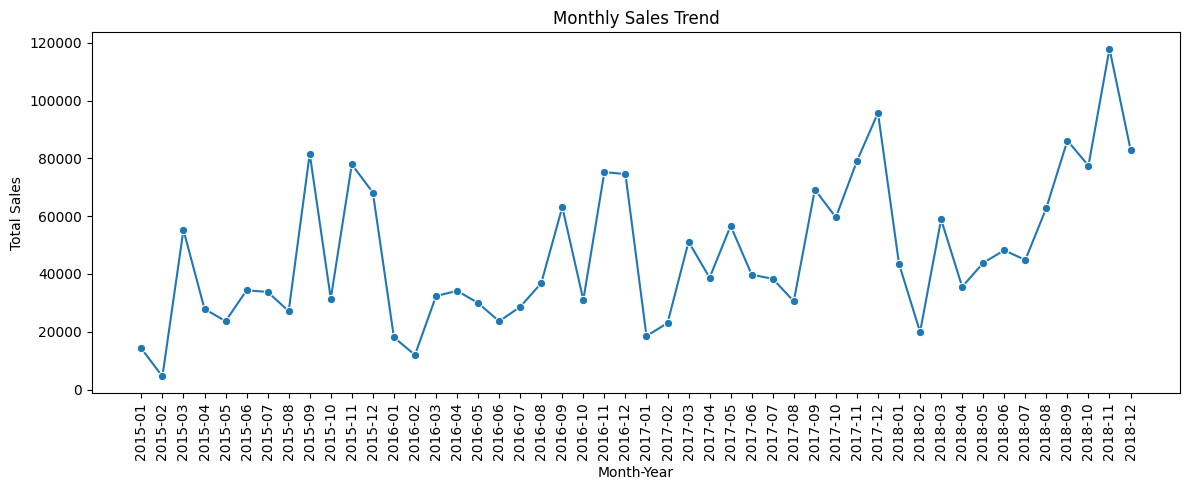

In [8]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

## Are sales going UP or DOWN? (TREND)

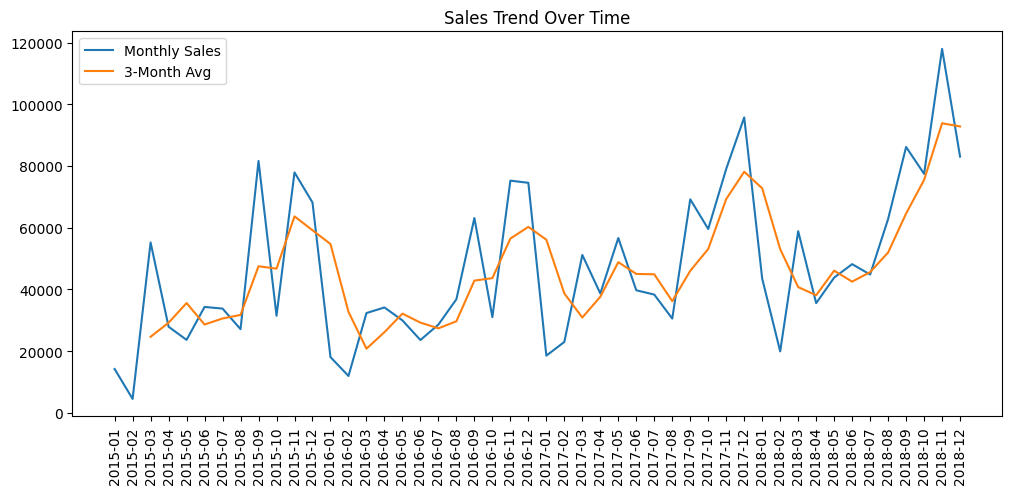

In [9]:
monthly_sales['Rolling_3_Month'] = (
    monthly_sales['Sales'].rolling(3).mean()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Sales'], label='Monthly Sales')
plt.plot(monthly_sales['Month_Year'], monthly_sales['Rolling_3_Month'], label='3-Month Avg')
plt.xticks(rotation=90)
plt.legend()
plt.title('Sales Trend Over Time')
plt.show()


### Tren Penjualan dari Waktu ke Waktu

Grafik menunjukkan perkembangan total penjualan bulanan dari tahun 2015 hingga 2018.

**Wawasan:**
- Pola musiman yang konsisten terlihat, dengan penjualan meningkat secara signifikan selama periode akhir tahun (September–Desember).

- Puncak penjualan hampir selalu terjadi pada bulan November atau Desember setiap tahun.

- Pola ini berulang setiap tahun, sehingga dapat disimpulkan bahwa peningkatan penjualan akhir tahun bukanlah kejadian random, melainkan tren musiman.

In [10]:
category_sales=(
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
category_sales

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


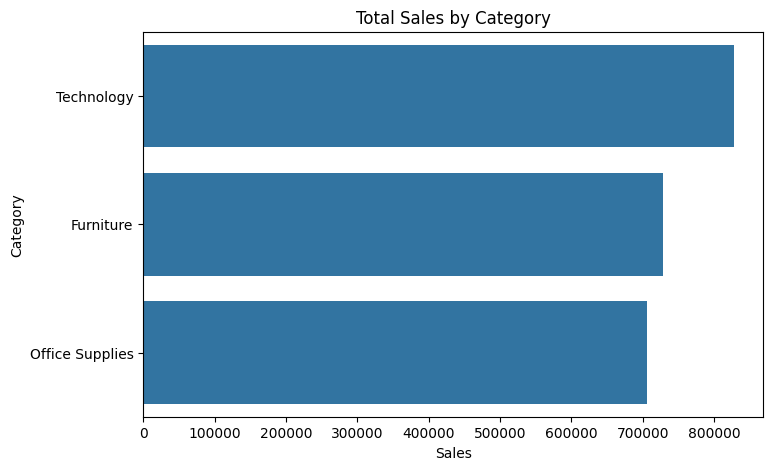

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Sales', y='Category')
plt.title('Total Sales by Category')
plt.show()

### Ringkasan Kinerja Kategori

Berdasarkan tren penjualan di seluruh kategori:

Wawasan:

- Teknologi merupakan pendorong utama peningkatan pendapatan perusahaan.

- Furnitur berpotensi memberikan kontribusi signifikan tetapi memiliki risiko fluktuasi yang lebih tinggi.

- Perlengkapan Kantor berfungsi sebagai pendorong pendapatan yang stabil dari waktu ke waktu.

## Do certain products sell well at certain times?

In [12]:
category_monthly=(
    df.groupby(['Month_Year', 'Category'])['Sales']
    .sum()
    .reset_index()
)
category_monthly['Month_Year']=category_monthly['Month_Year'].astype(str)
category_monthly.head(10)

,Month_Year,Category,Sales
0,2015-01,Furniture,6217.277
1,2015-01,Office Supplies,4845.140
2,2015-01,Technology,3143.290
3,2015-02,Furniture,1839.658
4,2015-02,Office Supplies,1071.724
5,2015-02,Technology,1608.510
6,2015-03,Furniture,14243.368
7,2015-03,Office Supplies,8602.455
8,2015-03,Technology,32359.974
9,2015-04,Furniture,7944.837


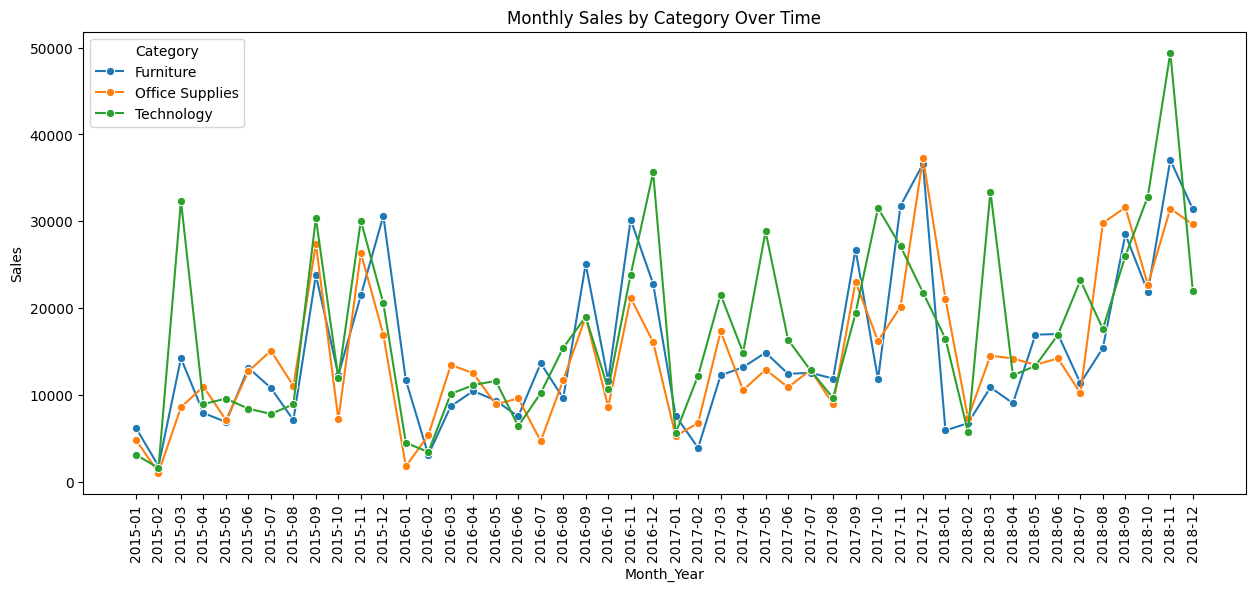

In [13]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=category_monthly,
    x='Month_Year',
    y='Sales',
    hue='Category',
    marker='o'
)

plt.xticks(rotation=90)
plt.title('Monthly Sales by Category Over Time')
plt.show()

### Penjualan Bulanan Berdasarkan Kategori

Grafik menunjukkan tren penjualan bulanan untuk setiap kategori produk.

Wawasan:
- Kategori Teknologi secara konsisten memberikan kontribusi terbesar terhadap total penjualan, terutama menjelang akhir tahun.

- Furnitur menunjukkan pola penjualan yang berfluktuasi, dengan lonjakan pada periode tertentu tetapi penjualan yang tidak konsisten sepanjang tahun.

- Perlengkapan Kantor memiliki pola penjualan yang relatif stabil, meskipun dengan volume penjualan yang lebih rendah daripada kategori lainnya.

In [14]:
avg_sales_order = (
    df.groupby('Category')
      .agg(
          Total_Sales=('Sales', 'sum'),
          Total_Orders=('Order_ID', 'nunique')
      )
      .reset_index()
)

avg_sales_order['Avg_Sales_per_Order'] = (
    avg_sales_order['Total_Sales'] / avg_sales_order['Total_Orders']
)

avg_sales_order.sort_values(by='Avg_Sales_per_Order', ascending=False)


,Category,Total_Sales,Total_Orders,Avg_Sales_per_Order
2,Technology,827455.8730,1519,544.737244
0,Furniture,728658.5757,1727,421.921584
1,Office Supplies,705422.3340,3676,191.899438


In [15]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

In [16]:
yearly_category_sales = (
    df.groupby(['year', 'Category'])['Sales']
      .sum()
      .reset_index()
      .sort_values(['Category', 'year'])
)


In [17]:
yearly_category_sales['YoY_Growth_%'] = (
    yearly_category_sales
    .groupby('Category')['Sales']
    .pct_change() * 100
)

yearly_category_sales


,year,Category,Sales,YoY_Growth_%
0,2015,Furniture,156477.8811,NaN
3,2016,Furniture,164053.8674,4.841570
6,2017,Furniture,195813.0400,19.358990
9,2018,Furniture,212313.7872,8.426787
1,2015,Office Supplies,149512.8200,NaN
4,2016,Office Supplies,133124.4070,-10.961209
7,2017,Office Supplies,182417.5660,37.027890
10,2018,Office Supplies,240367.5410,31.767760
2,2015,Technology,173865.5070,NaN
5,2016,Technology,162257.7310,-6.676296


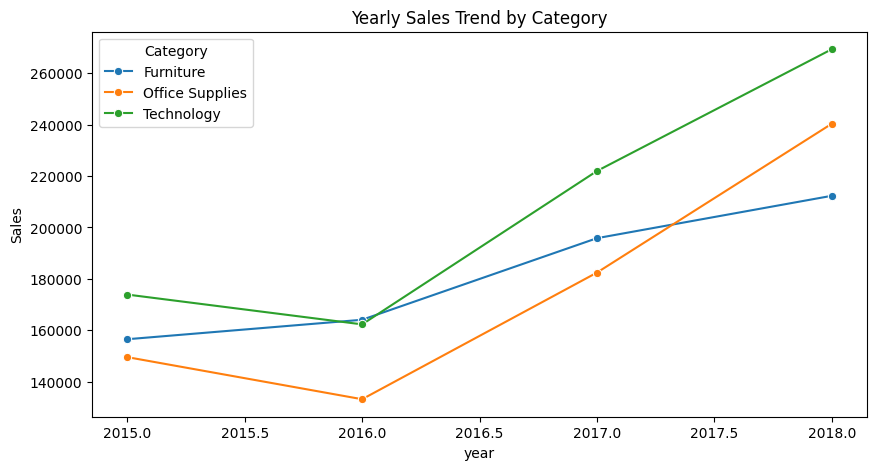

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=yearly_category_sales,
    x='year',
    y='Sales',
    hue='Category',
    marker='o'
)
plt.title('Yearly Sales Trend by Category')
plt.show()


## Tren Penjualan Tahunan

Tahun 2018 merupakan tahun pertumbuhan terbesar, dengan semua kategori mengalami lonjakan penjualan secara bersamaan.

- Kategori Teknologi menjadi pendorong pendapatan utama. Setelah mengalami stagnasi pada tahun 2016, penjualan Teknologi meningkat tajam pada tahun 2017 dan mencapai puncaknya pada tahun 2018.

- Perlengkapan Kantor menunjukkan pemulihan yang paling signifikan. Meskipun merupakan kategori dengan penjualan terendah pada tahun 2016, kinerjanya meningkat secara dramatis pada tahun 2018, hampir menyamai Teknologi.

- Furnitur tumbuh lebih moderat, dengan pola fluktuasi yang lebih stabil daripada Teknologi.

In [19]:
monthly_category_sales = (
    df.groupby(['month', 'Category'])['Sales']
      .mean()
      .reset_index()
)


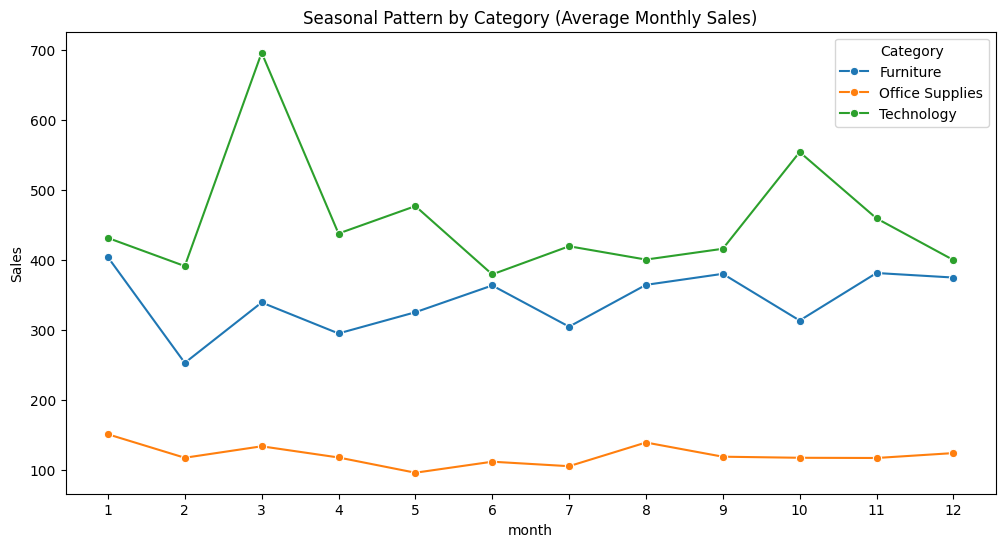

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_category_sales,
    x='month',
    y='Sales',
    hue='Category',
    marker='o'
)
plt.title('Seasonal Pattern by Category (Average Monthly Sales)')
plt.xticks(range(1,13))
plt.show()


## Pola Penjualan Musiman

*Kategori Teknologi sangat musiman:*

- Lonjakan penjualan terjadi pada bulan Maret, kemungkinan terkait dengan dimulainya anggaran perusahaan atau pembelian B2B.

- Puncak tertinggi terjadi pada bulan Oktober–November (Q4), sejalan dengan periode belanja akhir tahun dan promosi besar (musim liburan).

- Perlengkapan Kantor tetap stabil sepanjang tahun, mencerminkan kebutuhan rutin dengan harga yang relatif rendah.

- Furnitur berfluktuasi, dengan peningkatan penjualan di awal tahun (Januari) dan pertengahan tahun (sekitar September), tetapi tidak menunjukkan lonjakan ekstrem yang sama seperti Teknologi.

### Kesimpulan Akhir Analisis Kinerja Penjualan

Analisis ini bertujuan untuk memahami kinerja penjualan Superstore, mengidentifikasi pola tren, perilaku produk, dan faktor musiman yang memengaruhi penjualan, sehingga memberikan dasar untuk pengambilan keputusan bisnis yang lebih strategis.

Secara keseluruhan, analisis menunjukkan bahwa:

- Bisnis Superstore stabil dan berkembang.

- Pertumbuhan penjualan tidak acak, melainkan mengikuti tren tahunan dan musiman yang konsisten.

- Teknologi mendorong pertumbuhan, Perlengkapan Kantor mempertahankan stabilitas, dan Furnitur memberikan pendapatan tambahan dalam pola tertentu.

- Tidak ada indikasi bahwa penjualan bergantung pada satu faktor saja, melainkan merupakan hasil kombinasi produk, waktu, dan perilaku konsumen.

## Implikasi Bisnis

Berdasarkan hasil analisis ini, perusahaan dapat:

- Mengoptimalkan strategi promosi musiman.

- Menyesuaikan stok dan inventaris sesuai dengan karakteristik setiap kategori.

- Memanfaatkan kategori yang stabil untuk menjaga arus kas, dan kategori yang agresif untuk mendorong pertumbuhan.

In [21]:

df.to_csv('data/superstore_cleaned.csv', index=False)

print("✅ Data berhasil disimpan sebagai 'superstore_cleaned.csv'")

✅ Data berhasil disimpan sebagai 'superstore_cleaned.csv'
